## Impoting libraries

In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv("amazon.csv")
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

## Checking the missing values

In [3]:
print(df.isnull().values.any())
df[df.isna().any(axis=1)]

True


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


### Replacing

In [4]:
df = df.fillna(method="bfill")


In [5]:
num_df = df.iloc[:, 3:8]
spec_idx = num_df[num_df['rating'] == "|"].index[0]
num_df.iloc[spec_idx] = num_df.iloc[spec_idx-1]
num_df

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,₹399,"₹1,099",64%,4.2,"24,269"
1,₹199,₹349,43%,4.0,"43,994"
2,₹199,"₹1,899",90%,3.9,"7,928"
3,₹329,₹699,53%,4.2,"94,363"
4,₹154,₹399,61%,4.2,"16,905"
...,...,...,...,...,...
1460,₹379,₹919,59%,4,"1,090"
1461,"₹2,280","₹3,045",25%,4.1,"4,118"
1462,"₹2,219","₹3,080",28%,3.6,468
1463,"₹1,399","₹1,890",26%,4,"8,031"


## Parsing values

In [6]:
def parse_cash(value):
    return float(value[1:].replace(",", ""))
def parse_percentage(value):
    return int(value[:-1])
def parse_to_int(value):
    return int(value.replace(",", ""))
def parse_to_flt(value):
    return float(value.replace(",", ""))

num_df['discounted_price'] = num_df['discounted_price'].apply(parse_cash)
num_df['actual_price'] = num_df['actual_price'].apply(parse_cash)
num_df['discount_percentage'] = num_df['discount_percentage'].apply(parse_percentage)
num_df['rating_count'] = num_df['rating_count'].apply(parse_to_int)
num_df['rating'] = num_df['rating'].apply(parse_to_flt)

In [7]:
num_df

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64,4.2,24269
1,199.0,349.0,43,4.0,43994
2,199.0,1899.0,90,3.9,7928
3,329.0,699.0,53,4.2,94363
4,154.0,399.0,61,4.2,16905
...,...,...,...,...,...
1460,379.0,919.0,59,4.0,1090
1461,2280.0,3045.0,25,4.1,4118
1462,2219.0,3080.0,28,3.6,468
1463,1399.0,1890.0,26,4.0,8031


## Max_Min visualising

In [8]:
df_vis = pd.DataFrame([[max(num_df['actual_price']),max(num_df['discount_percentage']),max(num_df['rating']),max(num_df['rating_count'])],
                      [min(num_df['actual_price']),min(num_df['discount_percentage']),min(num_df['rating']),min(num_df['rating_count'])]], 
                      index=pd.Index(['max', 'min']), columns=num_df.columns[1:])

df_ten = num_df[1:].sample(n=10)
df_ten

def min_max_style(styler):
    styler.highlight_max(color="#edb87e")
    styler.highlight_min(color='#98d5e0')
    return styler

df_ten.style.pipe(min_max_style)

,discounted_price,actual_price,discount_percentage,rating,rating_count
1014,37247.000000,59890.000000,38,4.000000,323
515,2499.000000,5999.000000,58,3.700000,828
1407,3290.000000,5799.000000,43,4.300000,168
985,399.000000,999.000000,60,4.100000,1780
810,1815.000000,3100.000000,41,4.500000,92925
1361,2699.000000,3799.000000,29,4.000000,727
937,1199.000000,1999.000000,40,4.500000,22420
360,1499.000000,7999.000000,81,4.200000,22636
1383,2199.000000,3895.000000,44,3.900000,1085
1381,6120.000000,8478.000000,28,4.600000,6550


### Математичне сподівання та дисперсія набору даних

#### Standartising the data

In [9]:
def mean(df_col):
    return df_col.sum()/len(df_col)
def standart_diviation(df_col):
    mean_f = mean(df_col)
    sum_of_the_squered_differences = 0
    for i in range(len(df_col)):
        sum_of_the_squered_differences += (df_col[i]-mean_f)**2
    return math.sqrt(sum_of_the_squered_differences/len(df_col))    
def standartise(df_column):
    return (df_column-mean(df_column)) / standart_diviation(df_column)

std_num_df = num_df.copy()
std_num_df ['discounted_price'] = standartise(num_df['discounted_price'])
std_num_df ['actual_price'] = standartise(num_df['actual_price'])
std_num_df ['rating'] = standartise(num_df['rating'])
std_num_df ['discount_percentage'] = standartise(num_df['discount_percentage'])
std_num_df ['rating_count'] = standartise(num_df['rating_count'])

print(num_df.mean())
print(num_df.std())
print(num_df.var())
print("===============================================================")
print(std_num_df.mean())
print(std_num_df.std())
print(std_num_df.var())

discounted_price        3128.519747
actual_price            5451.134662
discount_percentage       47.708532
rating                     4.096587
rating_count           18282.472355
dtype: float64
discounted_price        6944.915934
actual_price           10875.703954
discount_percentage       21.620746
rating                     0.291574
rating_count           42726.119452
dtype: float64
discounted_price       4.823186e+07
actual_price           1.182809e+08
discount_percentage    4.674567e+02
rating                 8.501567e-02
rating_count           1.825521e+09
dtype: float64
discounted_price      -9.700242e-18
actual_price           1.940048e-17
discount_percentage    3.880097e-17
rating                -1.062177e-15
rating_count           1.940048e-17
dtype: float64
discounted_price       1.000341
actual_price           1.000341
discount_percentage    1.000341
rating                 1.000341
rating_count           1.000341
dtype: float64
discounted_price       1.000683
actual_price 

## Analyse the data

In [10]:
import seaborn as sns


<Axes: >

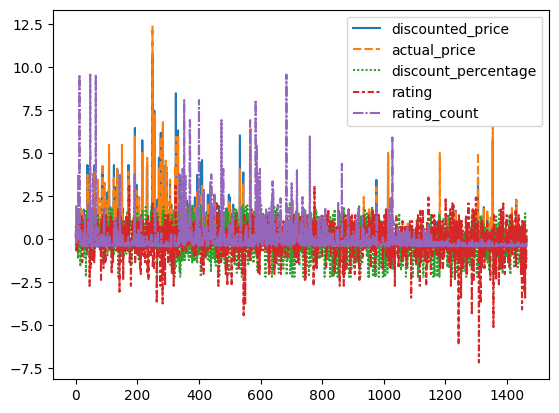

In [11]:
sns.lineplot(std_num_df)

<Axes: >

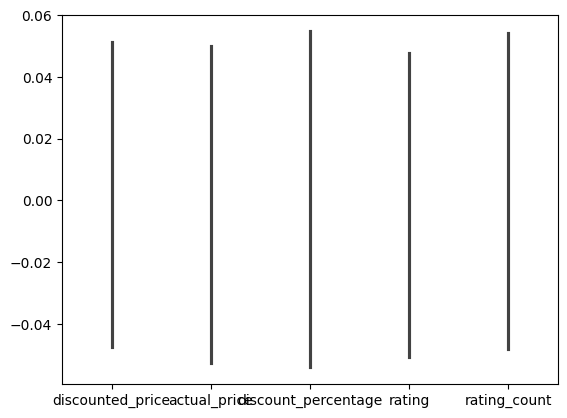

In [12]:
sns.barplot(std_num_df)

<Axes: >

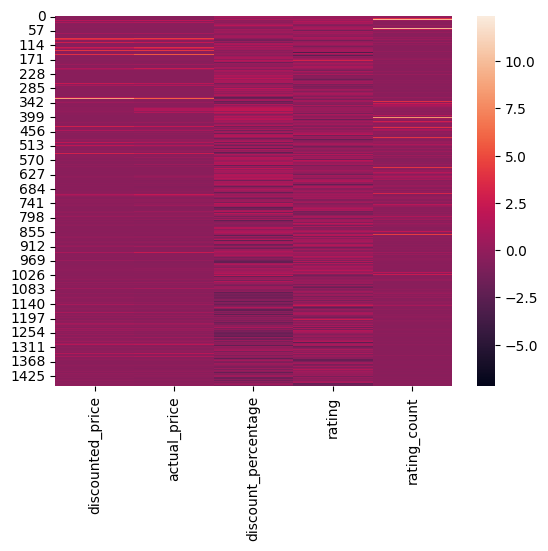

In [13]:
sns.heatmap(std_num_df)

<Axes: ylabel='Count'>

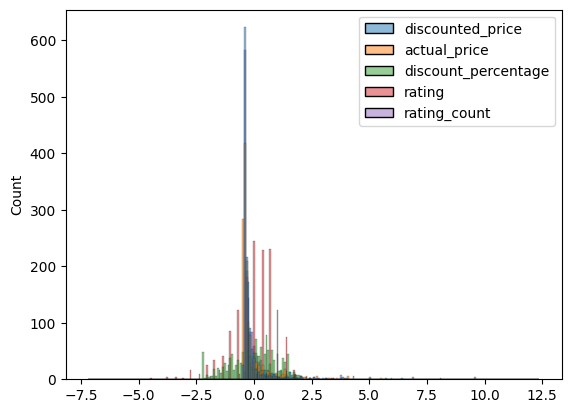

In [14]:
sns.histplot(std_num_df)

<Axes: ylabel='Count'>

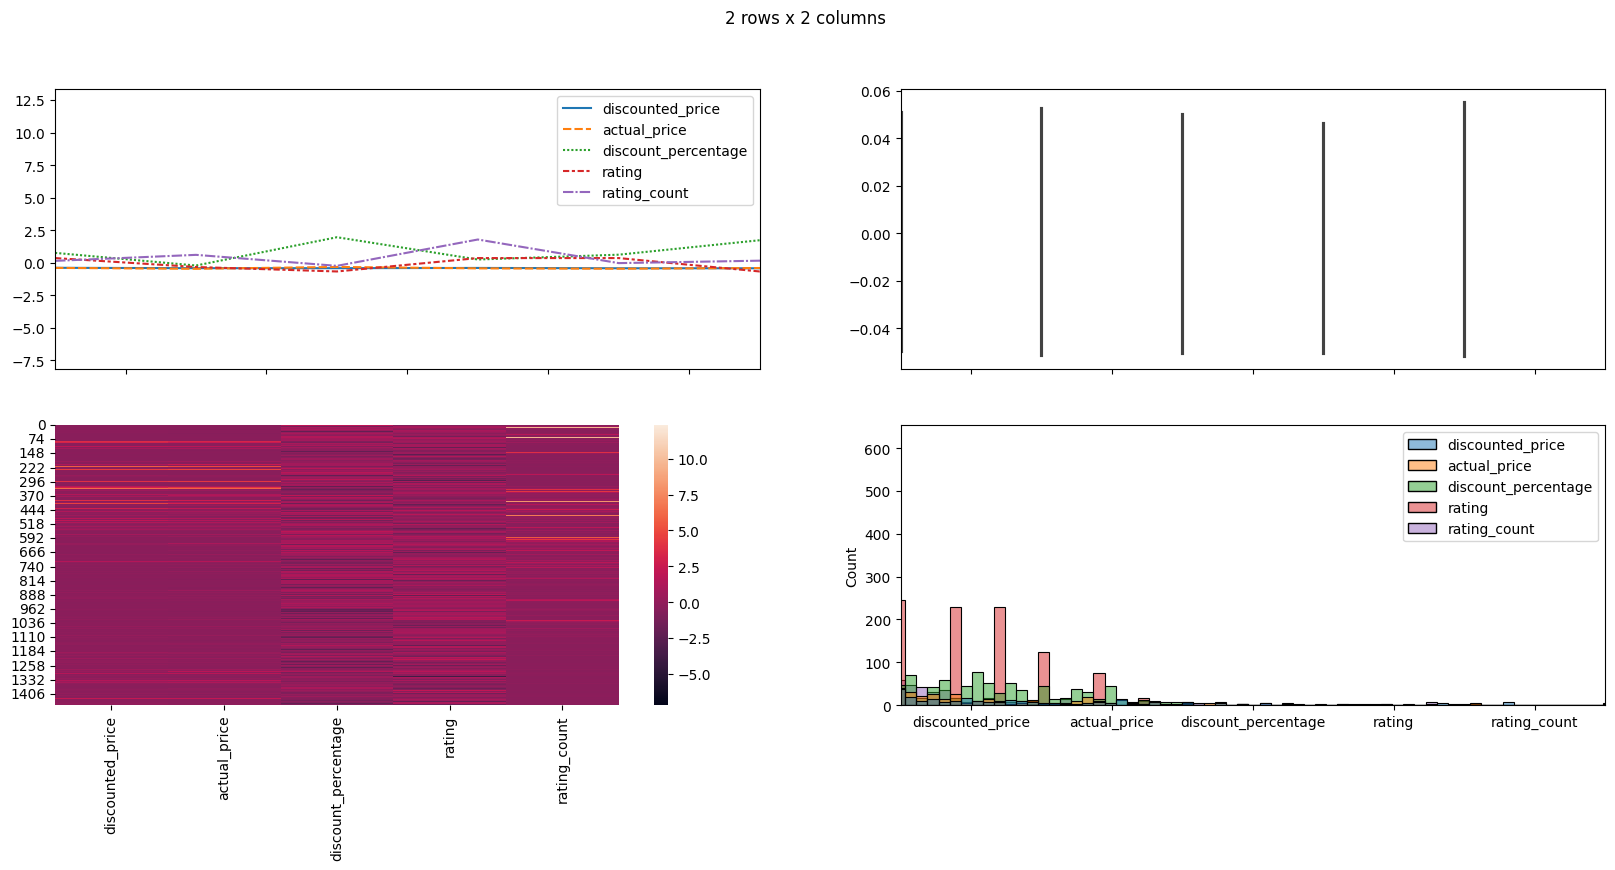

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,8))
fig.suptitle('2 rows x 2 columns')

sns.lineplot(ax=axes[0, 0], data=std_num_df)
sns.barplot(ax=axes[0, 1], data=std_num_df)
sns.heatmap(ax=axes[1, 0], data=std_num_df)
sns.histplot(ax=axes[1, 1], data=std_num_df)

#### Due to amount of data we should make a **data sampling**

In [16]:
std_num_df = std_num_df.sample(frac=0.3)

<Axes: >

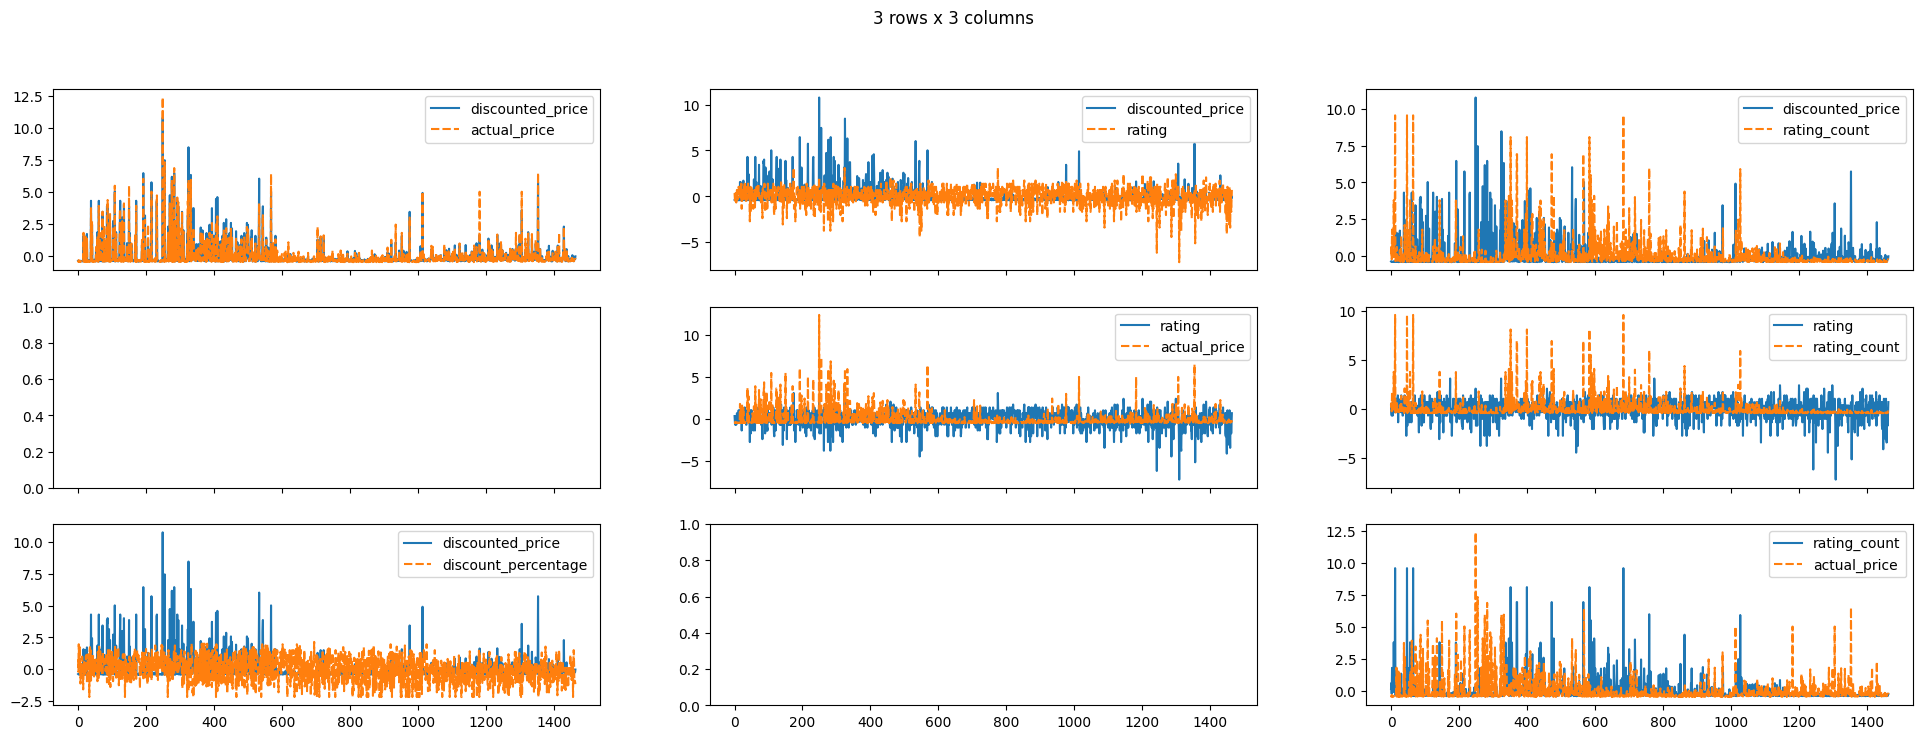

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(24,8))
fig.suptitle('3 rows x 3 columns')

sns.lineplot(ax=axes[0, 0], data=std_num_df[['discounted_price', 'actual_price']])
sns.lineplot(ax=axes[0, 1], data=std_num_df[['discounted_price', 'rating']])
sns.lineplot(ax=axes[0, 2], data=std_num_df[['discounted_price', 'rating_count']])

sns.lineplot(ax=axes[1, 1], data=std_num_df[['rating', 'actual_price']])
sns.lineplot(ax=axes[1, 2], data=std_num_df[['rating', 'rating_count']])


sns.lineplot(ax=axes[2, 2], data=std_num_df[['rating_count', 'actual_price']])

sns.lineplot(ax=axes[2, 0], data=std_num_df[['discounted_price', 'discount_percentage']])

## Pearson's koef

In [18]:
num_df.corr(method='pearson')

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961927,-0.242821,0.120330,-0.027172
actual_price,0.961927,1.000000,-0.118560,0.121633,-0.036089
discount_percentage,-0.242821,-0.118560,1.000000,-0.155373,0.010680
rating,0.120330,0.121633,-0.155373,1.000000,0.101837
rating_count,-0.027172,-0.036089,0.010680,0.101837,1.000000


### The biggest correlation
#### is discounted and actual price
Such result given due to often $price_{discounted}=price_{actual}-price_{actual}*percentage_{discount}$

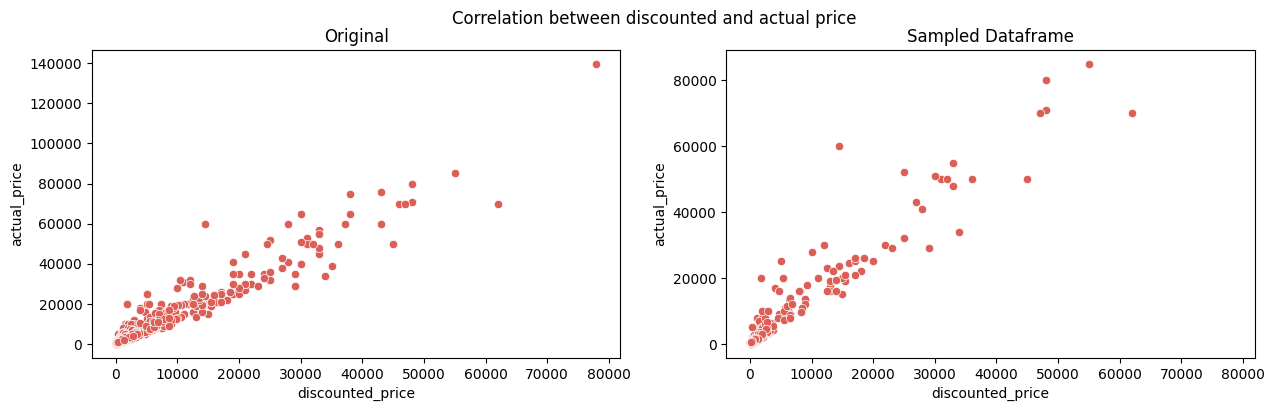

In [21]:
sampled_num_df = num_df.sample(frac=0.3)
sns.set_palette("hls")

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
fig.suptitle('Correlation between discounted and actual price')
sns.scatterplot(x='discounted_price', y='actual_price', data=num_df, ax=axes[0])
axes[0].set_title('Original')

sns.scatterplot(x='discounted_price', y='actual_price', data=sampled_num_df, ax=axes[1])
axes[1].set_title('Sampled Dataframe')

plt.show()